<a href="https://colab.research.google.com/github/srilaadebnath/ML_LAB_CODES/blob/main/question1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

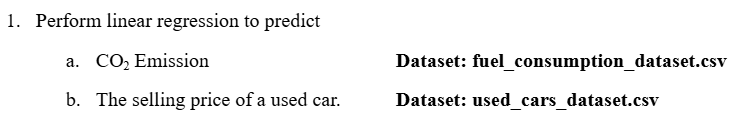

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
data = pd.read_csv("used_cars_dataset.csv")

print("First 10 rows:\n", data.head(10))
print("\nLast 10 rows:\n", data.tail(10))
print("\nDataset Info:")
data.info()
print("\nSummary Statistics:\n", data.describe())

print("\nMissing values:\n", data.isnull().sum())

data.dropna(inplace=True)
print("\nNew shape after dropping missing values:", data.shape)

print("\nColumn Names:", data.columns)


First 10 rows:
                         name  year  km_driven    fuel seller_type  \
0              Maruti 800 AC  2007      70000  Petrol  Individual   
1   Maruti Wagon R LXI Minor  2007      50000  Petrol  Individual   
2       Hyundai Verna 1.6 SX  2012     100000  Diesel  Individual   
3     Datsun RediGO T Option  2017      46000  Petrol  Individual   
4      Honda Amaze VX i-DTEC  2014     141000  Diesel  Individual   
5       Maruti Alto LX BSIII  2007     125000  Petrol  Individual   
6  Hyundai Xcent 1.2 Kappa S  2016      25000  Petrol  Individual   
7   Tata Indigo Grand Petrol  2014      60000  Petrol  Individual   
8   Hyundai Creta 1.6 VTVT S  2015      25000  Petrol  Individual   
9   Maruti Celerio Green VXI  2017      78000     CNG  Individual   

  transmission         owner  selling_price  
0       Manual   First Owner          60000  
1       Manual   First Owner         135000  
2       Manual   First Owner         600000  
3       Manual   First Owner         250

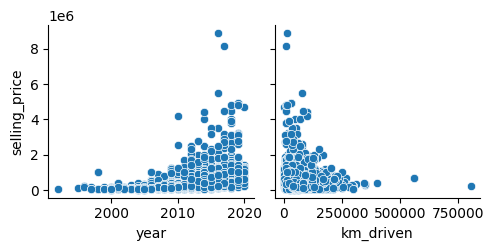


Shapes:
X_train: (3472, 2)
X_test: (868, 2)
y_train: (3472,)
y_test: (868,)


In [ ]:
X = data[["year", "km_driven"]]
y = data["selling_price"]
sns.pairplot(data=data, x_vars=["year", "km_driven"], y_vars=["selling_price"], kind="scatter")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("\n--- Training Data ---")
print("MSE:", mse_train)
print("MAE:", mae_train)
print("R²:", r2_train)



--- Training Data ---
MSE: 282566785808.87866
MAE: 274015.8746195788
R²: 0.17364377054231805


In [ ]:
y_test_pred = model.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\n--- Test Data ---")
print("MSE:", mse_test)
print("MAE:", mae_test)
print("R²:", r2_test)


--- Test Data ---
MSE: 255707328588.57532
MAE: 256362.48559820454
R²: 0.1620831376822649


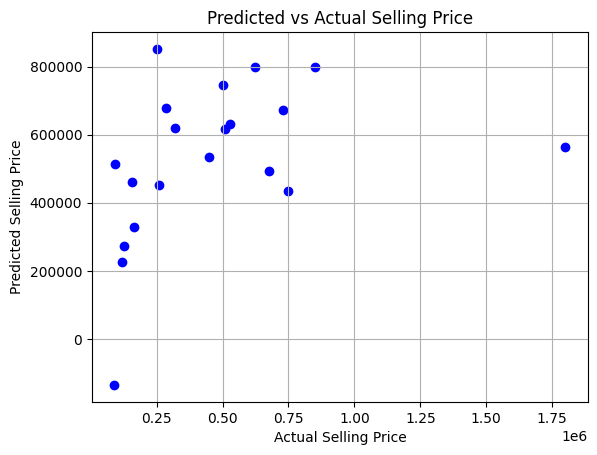

In [ ]:
plt.scatter(y_test[:20], y_test_pred[:20], color='blue')
plt.title("Predicted vs Actual Selling Price")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.grid(True)
plt.show()